# HSQL to Unidades Vecinales

This notebook creates __santiago_unidadesvecinales_hqsl_4_5_kmh__, which has HQSL mean data for all Unidades Vecinales in Santiago, Chile.

## Import libraries

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Notebook config

In [2]:
##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

# save output to database?
save = False
# How to save?
if_exists='replace'
# save to local?
save_local = True
# use local data?
local_data = True

# Persona speed
walk_speed = 4.5
speed_name = str(walk_speed).replace('.','_')

##### WARNING ##### WARNING ##### WARNING ##### WARNING ##### WARNING #####

In [3]:
# 'alex' or 'edgar'
all_local_dirs = 'edgar'
# Output hexs resolution
res = 10

In [4]:
if all_local_dirs == 'alex':
    grl_dir = "../../../data/external/temporal_todocker/santiago/proximidad/"
elif all_local_dirs == 'edgar':
    grl_dir = "../../../data/processed/santiago/"
else:
    print("WARNING: Fix all_local_dirs variable")

## Download data

In [6]:
if local_data:
    hex_gdf = gpd.read_file(grl_dir + f'santiago_hexanalysis_res{res}_{speed_name}_kmh.geojson')
else:
    query = f'SELECT * FROM projects_research.santiago_hexanalysis_{speed_name}_kmh WHERE res = {res}'
    hex_gdf = aup.gdf_from_query(query)

hex_gdf = hex_gdf.dropna()
# Show
print(hex_gdf.shape)
hex_gdf.head(1)

(58695, 31)


,sociability_supplying,sociability_caring,sociability_living,sociability_enjoying,sociability_learning,sociability_working,sociability,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,hex_id,supplying,caring,living,enjoying,learning,working,hqsl,res,geometry
0,4.583333,1.875,0.543189,4.702381,5.0,0.494537,17.198441,10.0,6.334387,5.75,...,8ab2c5540647fff,5.87963,5.25712,3.59773,4.894993,5.833333,4.943534,30.406339,10,"POLYGON ((-70.67723 -33.43729, -70.67786 -33.4..."


## Load data

Nivel socioeconomico

In [7]:
nse_gdf = gpd.read_file(f"../../../data/processed/santiago/nivel_socioeconomico/BAS_ismt_urbano_2022.shp")
nse_gdf = nse_gdf[['geocodigo','gse_dom','gse_prom','ismtpn','poblacion','geometry']].copy()
nse_gdf['dens_pobha'] = nse_gdf['poblacion'] / (nse_gdf.area/10000)
nse_gdf = nse_gdf.drop(columns='poblacion')
nse_gdf = nse_gdf.to_crs("EPSG:4326")
print(nse_gdf.shape)
nse_gdf.head(4)

(1863, 6)


,geocodigo,gse_dom,gse_prom,ismtpn,geometry,dens_pobha
0,13101011001,C1,C2,0.769388,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4...",103.946703
1,13101011002,C1,C2,0.750089,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4...",226.888923
2,13101011003,C1,C2,0.763195,"POLYGON ((-70.63647 -33.43745, -70.63653 -33.4...",125.017364
3,13101011004,C1,C2,0.745123,"POLYGON ((-70.64531 -33.44252, -70.64626 -33.4...",103.874032


Ciclo de vida

In [8]:
cv_gdf = gpd.read_file(f"../../../data/processed/santiago/nivel_socioeconomico/zonas_censales_hogares_RM.shp")
cv_gdf = cv_gdf[['GEOCODI','prc_hg_','prc_cn_','prc_dmy','pr_JHES','prc_OcA','geometry']].copy()
cv_gdf = cv_gdf.to_crs("EPSG:4326")
print(cv_gdf.shape)
cv_gdf.head(4)

(2376, 7)


,GEOCODI,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA,geometry
0,13101011001,0.763760,0.107536,0.133785,0.799323,0.828112,"POLYGON ((-70.63925 -33.43663, -70.63932 -33.4..."
1,13101011002,0.827209,0.100078,0.076622,0.802971,0.795152,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4..."
2,13101011003,0.819686,0.097561,0.090592,0.808362,0.870209,"POLYGON ((-70.63527 -33.43685, -70.63525 -33.4..."
3,13101011004,0.797414,0.118534,0.092672,0.773707,0.750000,"POLYGON ((-70.64531 -33.44252, -70.64626 -33.4..."


### Join data

In [9]:
# socioeconomic gdf
se_gdf = nse_gdf.merge(cv_gdf.drop(columns='geometry'),
                      left_on = 'geocodigo',
                      right_on = 'GEOCODI',
                      how='left')
print(se_gdf.shape)
se_gdf.head(4)

(1863, 12)


,geocodigo,gse_dom,gse_prom,ismtpn,geometry,dens_pobha,GEOCODI,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA
0,13101011001,C1,C2,0.769388,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4...",103.946703,13101011001,0.763760,0.107536,0.133785,0.799323,0.828112
1,13101011002,C1,C2,0.750089,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4...",226.888923,13101011002,0.827209,0.100078,0.076622,0.802971,0.795152
2,13101011003,C1,C2,0.763195,"POLYGON ((-70.63647 -33.43745, -70.63653 -33.4...",125.017364,13101011003,0.819686,0.097561,0.090592,0.808362,0.870209
3,13101011004,C1,C2,0.745123,"POLYGON ((-70.64531 -33.44252, -70.64626 -33.4...",103.874032,13101011004,0.797414,0.118534,0.092672,0.773707,0.750000


## Hexagon to Census Zone

### Spatial join

In [10]:
se_hex = gpd.sjoin(hex_gdf, se_gdf)
print(se_hex.shape)
se_hex.head(4)

(78168, 43)


,sociability_supplying,sociability_caring,sociability_living,sociability_enjoying,sociability_learning,sociability_working,sociability,environmental_impact_supplying,environmental_impact_caring,environmental_impact_living,...,gse_dom,gse_prom,ismtpn,dens_pobha,GEOCODI,prc_hg_,prc_cn_,prc_dmy,pr_JHES,prc_OcA
0,4.583333,1.875000,0.543189,4.702381,5.000000,0.494537,17.198441,10.00,6.334387,5.75,...,D,C3,0.636966,182.799505,13101061002,0.658605,0.267154,0.079303,0.471879,0.563555
0,4.583333,1.875000,0.543189,4.702381,5.000000,0.494537,17.198441,10.00,6.334387,5.75,...,C3,C3,0.655960,319.622201,13101071003,0.592969,0.346875,0.061719,0.497656,0.657031
1,1.875000,1.666667,0.000000,0.324074,3.402778,0.000000,7.268519,1.25,7.438390,0.00,...,D,D,0.518281,19.143702,13112051005,0.357843,0.576797,0.075163,0.147059,0.459150
1,1.875000,1.666667,0.000000,0.324074,3.402778,0.000000,7.268519,1.25,7.438390,0.00,...,C3,D,0.544484,0.033760,13112051004,1.000000,NaN,NaN,NaN,1.400000


### Data processing

In [11]:
cols_join = list(hex_gdf.columns)[2:]
cols_join.remove('res')
cols_join.remove('hex_id')
cols_join.remove('geometry')
cols_join.append('GEOCODI')

In [12]:
se_hex = se_hex[cols_join].copy() #Added this because it tried to calculate mean of geom
# se_hex = se_hex.drop(columns=['gse_dom','gse_prom'])
se_hex = se_hex.groupby(['GEOCODI']).mean()
se_hex = se_hex.reset_index()
# Merge back to geometry
se_hqsl = pd.merge(se_gdf, se_hex, right_on='GEOCODI',
                   left_on='GEOCODI', how = 'right')
print(se_hqsl.shape)
se_hqsl.head(4)

(1639, 38)


,geocodigo,gse_dom,gse_prom,ismtpn,geometry,dens_pobha,GEOCODI,prc_hg_,prc_cn_,prc_dmy,...,wellbeing_learning,wellbeing_working,wellbeing,supplying,caring,living,enjoying,learning,working,hqsl
0,13101011001,C1,C2,0.769388,"POLYGON ((-70.64101 -33.43757, -70.64103 -33.4...",103.946703,13101011001,0.763760,0.107536,0.133785,...,6.427642,5.196116,42.738248,7.581116,6.336907,5.599436,9.128404,4.462990,6.738089,39.846943
1,13101011002,C1,C2,0.750089,"POLYGON ((-70.64645 -33.43683, -70.64718 -33.4...",226.888923,13101011002,0.827209,0.100078,0.076622,...,6.331641,5.074883,42.941134,8.236338,5.876095,6.304201,8.877243,4.428038,6.741553,40.463468
2,13101011003,C1,C2,0.763195,"POLYGON ((-70.63647 -33.43745, -70.63653 -33.4...",125.017364,13101011003,0.819686,0.097561,0.090592,...,6.409698,5.111823,41.203926,6.942165,6.603295,5.311967,8.925303,4.314657,6.847268,38.944655
3,13101011004,C1,C2,0.745123,"POLYGON ((-70.64531 -33.44252, -70.64626 -33.4...",103.874032,13101011004,0.797414,0.118534,0.092672,...,6.081745,5.381711,45.294434,7.800574,7.110236,6.709599,9.038061,4.655720,7.241140,42.555330


<AxesSubplot: >

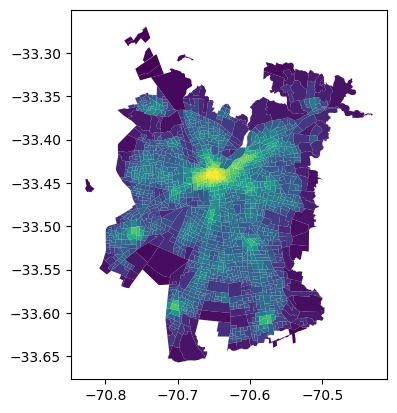

In [13]:
se_hqsl.plot('hqsl')

In [14]:
se_hqsl.hqsl.mean()

16.578419270498944

## Upload data

In [15]:
if save:
    table = f'santiago_zonascensalesanalysis_{speed_name}_kmh'
    schema = 'projects_research'
    aup.gdf_to_db_slow(se_hqsl, table, schema, if_exists='append')
if save_local:
    se_hqsl.to_file(grl_dir + f'santiago_zonascensalesanalysis_{speed_name}_kmh.geojson')